In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import metrics
import re

In [5]:
# Data source: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps
path = os.getcwd() + "/../data/Google-Playstore.csv"
df = pd.read_csv(path)

In [9]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [11]:
df.isnull().sum()

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [12]:
df.isnull().sum() / df.shape[0] * 100

App Name              0.000086
App Id                0.000000
Category              0.000000
Rating                0.989345
Rating Count          0.989345
Installs              0.004626
Minimum Installs      0.004626
Maximum Installs      0.000000
Free                  0.000000
Price                 0.000000
Currency              0.005837
Size                  0.008474
Minimum Android       0.282324
Developer Id          0.001427
Developer Website    32.894657
Developer Email       0.001340
Released              3.071972
Last Updated          0.000000
Content Rating        0.000000
Privacy Policy       18.199879
Ad Supported          0.000000
In App Purchases      0.000000
Editors Choice        0.000000
Scraped Time          0.000000
dtype: float64

In [14]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [16]:
# check highest correlated features
max = 0 
max_col = ''

for column in list(df.select_dtypes(include=[float, int]).columns):
    current = sum(abs(number) for number in df.corr()[column])
    # print(df.corr()[column].sort_values())
    if current > max:
        max = current
        max_col = column

print(f"Highest correlations is {max_col} with: \n{df.corr()[max_col].sort_values()}")

C:\Users\~HugoBrouwerTraineeS\AppData\Local\Temp\ipykernel_8112\4005594250.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  current = sum(abs(number) for number in df.corr()[column])
C:\Users\~HugoBrouwerTraineeS\AppData\Local\Temp\ipykernel_8112\4005594250.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"Highest correlations is {max_col} with: \n{df.corr()[max_col].sort_values()}")


Highest correlations is Maximum Installs with: 
Price              -0.000515
Free                0.001815
Ad Supported        0.002882
Rating              0.012615
In App Purchases    0.016101
Editors Choice      0.064206
Rating Count        0.547571
Minimum Installs    0.954037
Maximum Installs    1.000000
Name: Maximum Installs, dtype: float64


In [7]:
# pak een n sample vd dataframe
eng_df = df.drop(['Installs', 'Currency', 'Minimum Installs', 'Developer Website', 'Developer Email', 'Privacy Policy', 'App Name'], axis=1)

# pak een n sample vd dataframe
eng_df_s = eng_df.sample(n=10000, random_state=123) #small
eng_df_t = eng_df.sample(n=1000, random_state=123) #tiny
eng_df_tt = eng_df.sample(n=200, random_state=123) #teeny-tiny

df_sample_to_10000 = df[df['Maximum Installs'] < 10000].sample(n=10000, random_state=123)

#Select one for further use
eng_df = eng_df_t

In [8]:
#What kind of Size values exist, going by the text part of the string
size_cats = eng_df_s['Size'].apply(lambda x: re.findall('([\sA-Za-z]*$)', str(x))[0])
print(size_cats.value_counts())

#Knowing there are three kinds of known sizes (kb, Mb, Gb) we convert these to Mb
#But because there are also missing values or OS dependent sizes, we store this categorically in an extra column
#(known sizes will be categorized as 'known')
def process_Size(value):
    value = str(value)
    conversion = {'k':0.001, 'M':1.0, 'G':1000.0}
    if value[-1] in conversion.keys():
        value = value.replace(',', '') #added because some 
        size = float(value[:-1]) * conversion[value[-1]]
        category = 'Known'
    else:
        size = None
        category = value
    return (size, category)


temp_df = pd.DataFrame(eng_df['Size'].apply(lambda x: process_Size(x)).tolist(), columns=['Size', 'Size_category'])
eng_df['Size'] = temp_df['Size'].values
eng_df['Size_category'] = temp_df['Size_category'].values
#del temp_df ##bugged, but I'd prefer to delete

M                     9521
Varies with device     315
k                      164
Name: Size, dtype: int64


In [17]:
df = df.drop(['Installs', 'Currency', 'Minimum Installs', 'Developer Website', 'Developer Email', 'Privacy Policy', 'App Name'], axis=1)

# ook droppen: Rating/ Scraped Time/ 

In [18]:
plt.figure(figsize=(10,10))
# sns.histplot(df_s['Maximum Installs'])

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [19]:
#Separate quantitative columns into a quantitative dataframe
q_df = eng_df[['Rating', 'Rating Count', 'Maximum Installs', 'Price', 'Size']]
standard_deviations = 3
q_df = q_df[q_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations)
   .all(axis=1)]

#Log-transform
#Needs to be edited so it's only applied to some columns (e.g. installs but not rating)
transf_q_df = q_df.apply(lambda x: np.log10(x, where=0<x))

c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Maximum Installs', ylabel='Rating'>

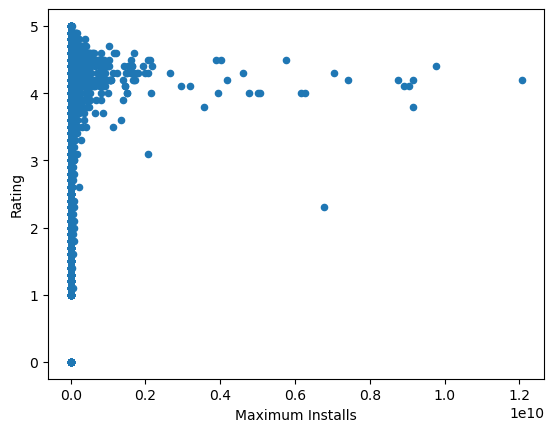

In [89]:
df.plot.scatter('Maximum Installs', 'Rating')

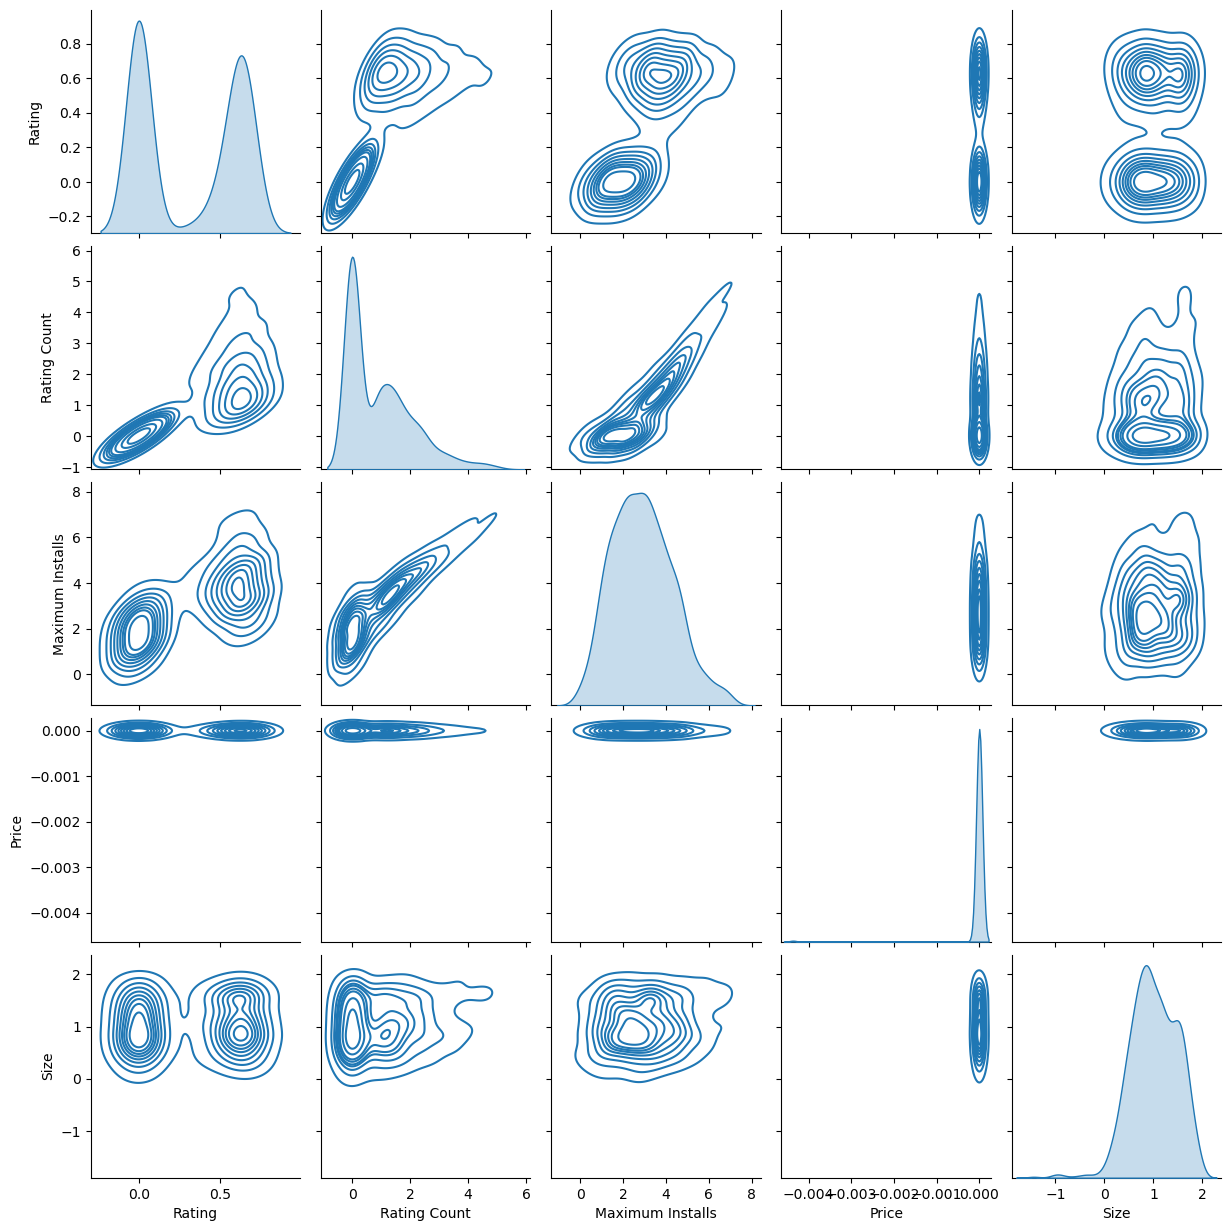

In [20]:
sns.pairplot(transf_q_df, kind="kde")

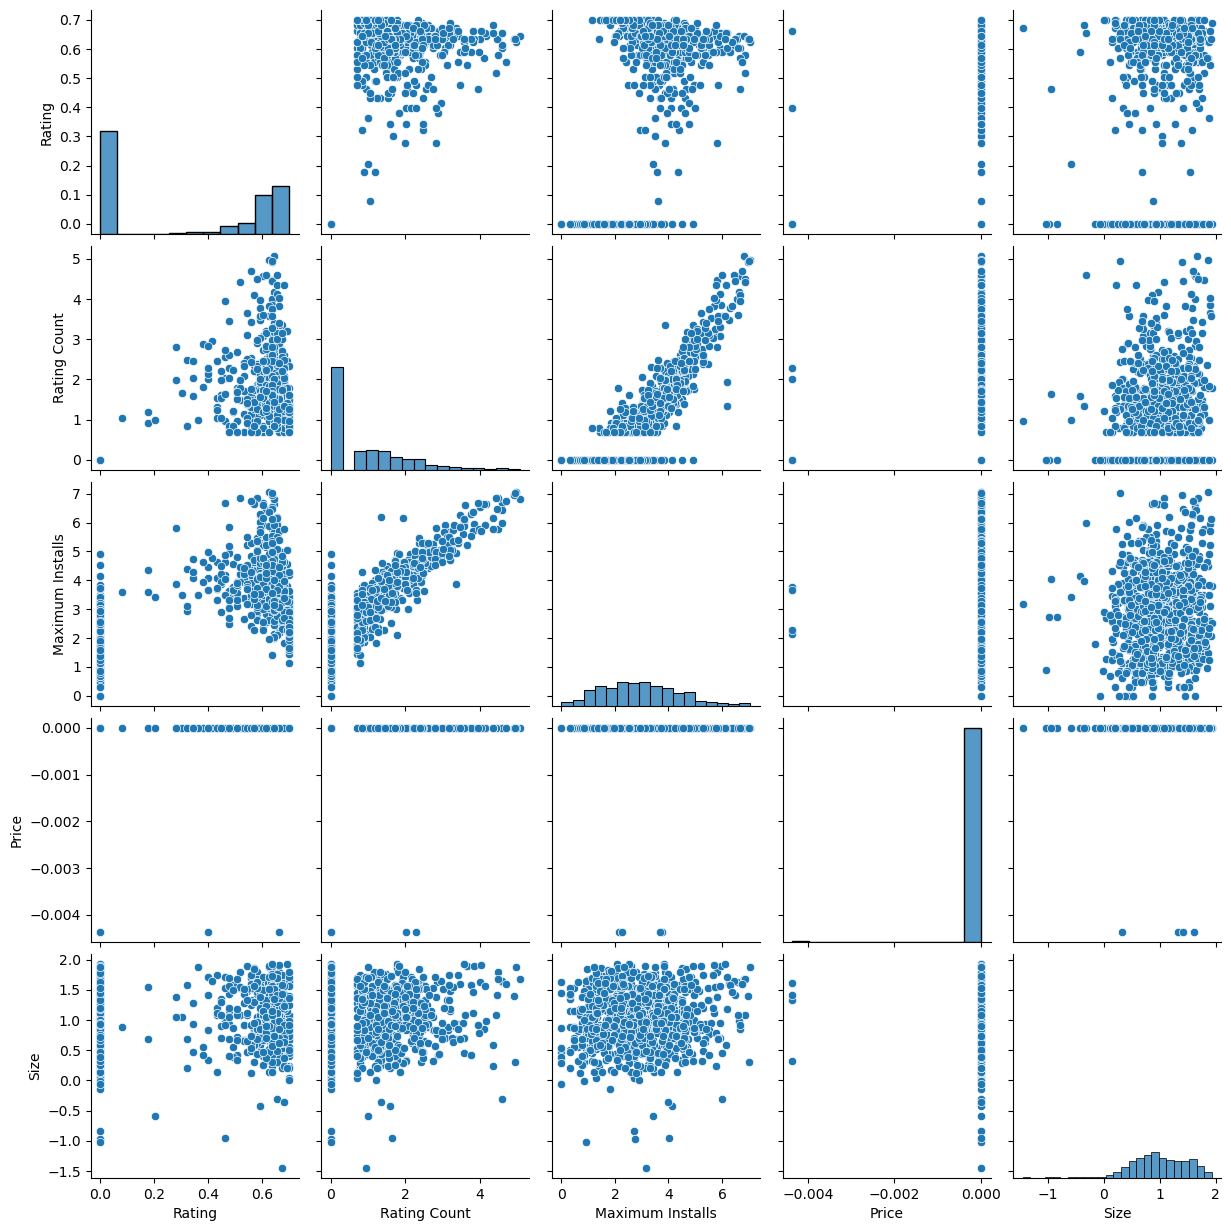

In [22]:
sns.pairplot(transf_q_df)

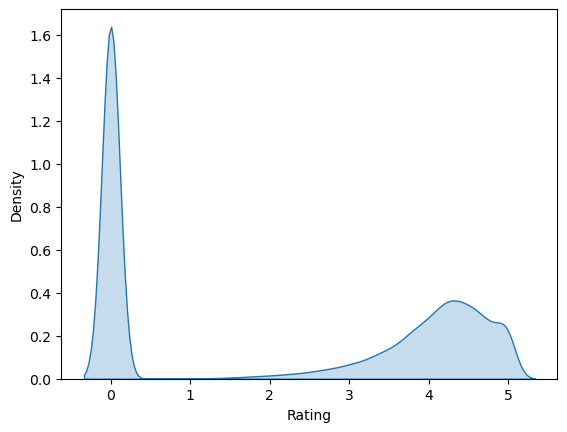

In [21]:
kde = sns.kdeplot(df['Rating'], fill=True)

In [219]:
((df['Released'] == df['Last Updated']).sum()) / len(df.index) * 100

14.472853644532682

In [23]:
df.isnull().sum()

App Id                  0
Category                0
Rating              22883
Rating Count        22883
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Minimum Android      6530
Developer Id           33
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Scraped Time            0
dtype: int64

In [25]:
df.dropna()
df['Released Year'] = pd.to_datetime(df['Released']).apply(lambda date: int(date.year))
df['Last Updated Year'] = pd.to_datetime(df['Last Updated']).apply(lambda date: int(date.year))


,App Id,Category,Rating,Rating Count,Maximum Installs,Free,Price,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,com.ishakwe.gakondo,Adventure,0.0,0.0,15,True,0.0,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35
1,com.webserveis.batteryinfo,Tools,4.4,64.0,7662,True,0.0,2.9M,5.0 and up,Webserveis,"May 21, 2020","May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
2,com.doantiepvien.crm,Productivity,0.0,0.0,58,True,0.0,3.7M,4.0.3 and up,Cabin Crew,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35
3,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,19,True,0.0,1.8M,4.0.3 and up,Climate Smart Tech2,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
4,com.horodyski.grower,Tools,0.0,0.0,478,True,0.0,6.2M,4.1 and up,Rafal Milek-Horodyski,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,com.toefltimer,Education,3.4,17.0,1980,True,0.0,10M,4.1 and up,Julio Augusto Vera,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False,2021-06-16 12:59:18
2312940,com.threedream.oruonline,Education,0.0,0.0,430,True,0.0,44M,4.1 and up,"3Dream Studios, LLC","Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False,2021-06-16 12:59:19
2312941,datastructure.appoworld.datastucture,Education,0.0,0.0,202,True,0.0,29M,5.0 and up,appoworld,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False,2021-06-16 12:59:19
2312942,ishan.devi.suktam,Music & Audio,3.5,8.0,2635,True,0.0,10M,5.0 and up,Bhakti,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False,2021-06-16 12:59:19


In [26]:
df.Category.unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

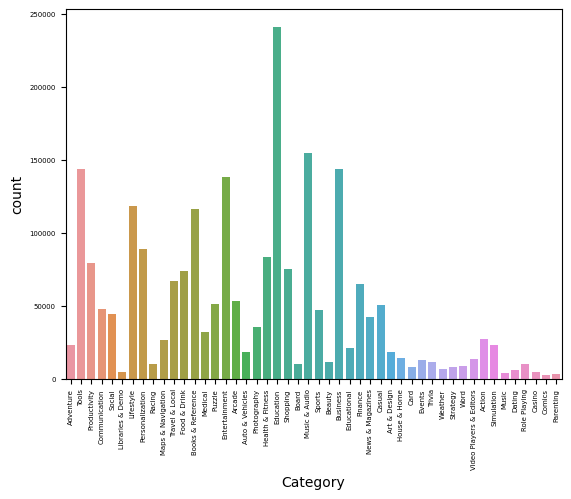

In [27]:
sns.countplot(data=df, x="Category")
plt.xticks(rotation=90)  
plt.tick_params(labelsize=5)

**CELL BELOW REDUNDANT**

In [90]:
# waarden pakken boven 1% & onder de 99%
q1, q2 = .01, .99
filtered_df = df["Maximum Installs"].quantile([q1, q2])
filtered_df = df[(df['Maximum Installs'] > filtered_df[q1]) & (df['Maximum Installs'] < filtered_df[q2])]

In [93]:
# Unreleastic ratings?
((df['Rating'] < 0) | (df['Rating'] > 5)).sum()

0

In [30]:
# Bins for ratings, needs cleaning
df['Rating Bin'] = pd.cut(df['Rating'],bins=[-0.1,1,2,3,4,5], labels=[1,2,3,4,5])


In [31]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

**Test Baselines**

In [325]:
x = df[['Rating Count', 'Maximum Installs', 'Price', 'Free', 'Editors Choice', 'Editors Choice', 'In App Purchases']].values
y = df['Rating Bin'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [326]:
scaler = sklearn.preprocessing.StandardScaler().fit(x_train)
scaled_X_train = scaler.transform(x_train)
scaled_X_test = scaler.transform(x_test)

In [327]:
c = LogisticRegression().fit(x_train, y_train)

In [328]:
preds = c.predict(x_test)

In [329]:
accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy score is {}'.format(accuracy))

Accuracy score is 0.3288590604026846


In [330]:
print(metrics.confusion_matrix(y_test, preds))

[[ 16   0  55  71 798]
 [  0   0   0   1   9]
 [  0   0   0   3  78]
 [  0   0   0   8 274]
 [  0   0   0  11 613]]


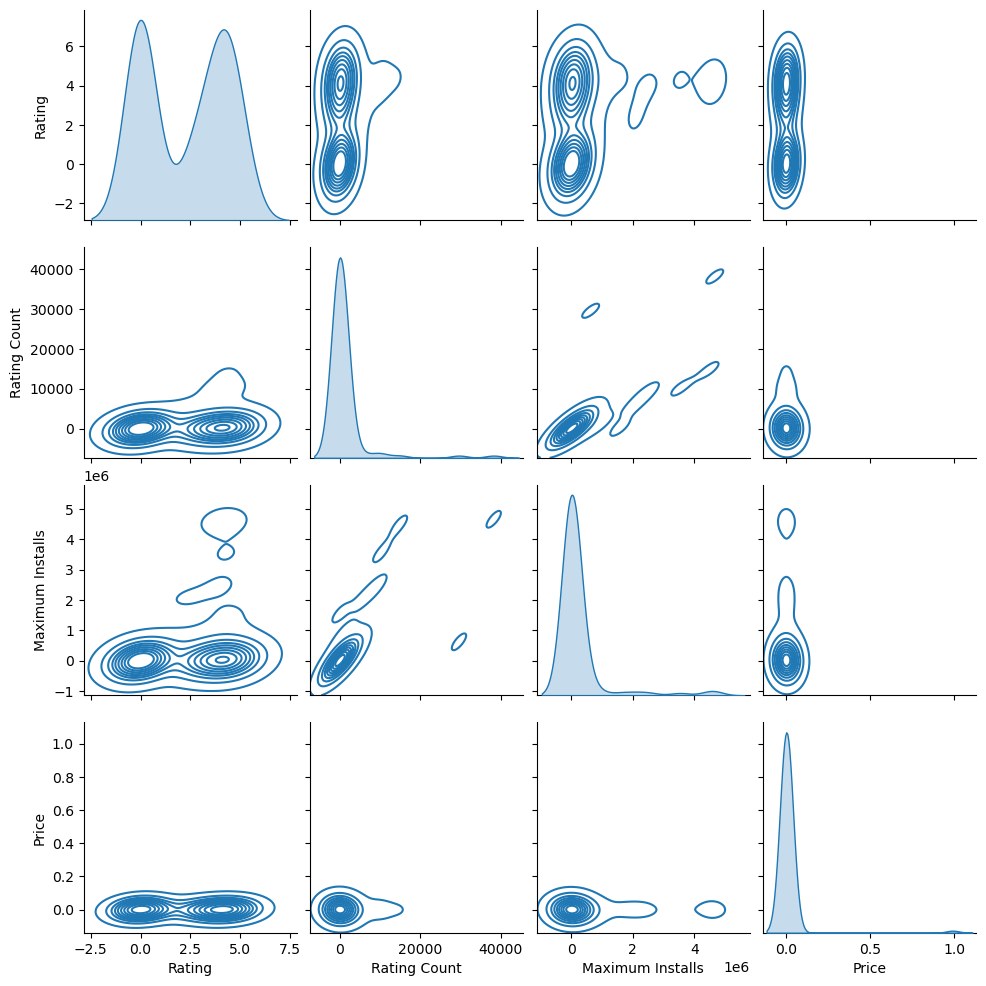

In [18]:
sns.pairplot(df_sample[['Rating', 'Rating Count', 'Maximum Installs', 'Price']], kind="kde")

** Further Analysis **

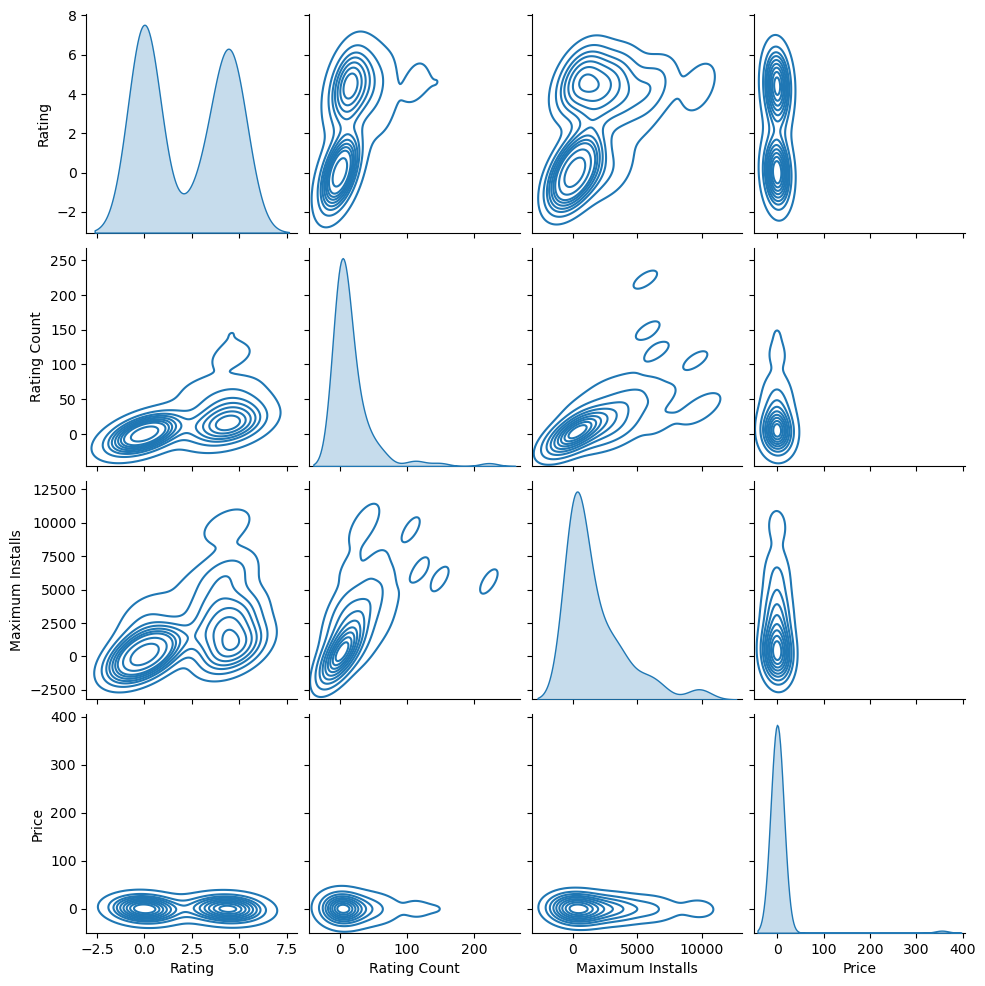

In [13]:
sns.pairplot(df_sample_to_10000[['Rating', 'Rating Count', 'Maximum Installs', 'Price']], kind="kde")

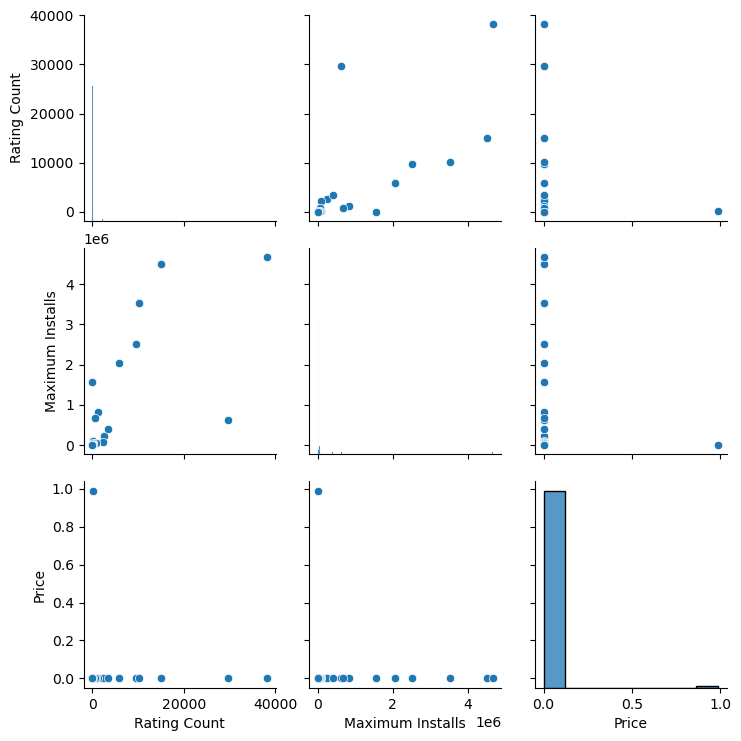

In [22]:
sns.pairplot(df_sample[['Rating Count', 'Maximum Installs', 'Price']])

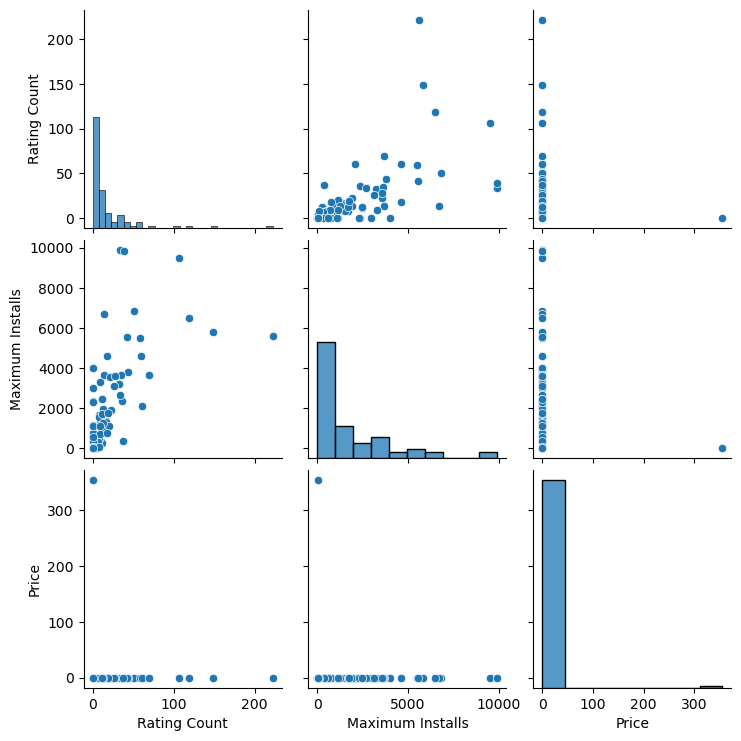

In [20]:
sns.pairplot(df_sample_to_10000[['Rating Count', 'Maximum Installs', 'Price']])

In [32]:
#PCA to see if a) quantitative variables combined show some clustering and b) wether such clusters correspond to categorical variables
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(q_df)
scaled_qdf = scaler.transform(q_df)

pca = PCA(n_components=4)
pca.fit(scaled_qdf)

x_pca = pca.transform(scaled_qdf)
print(scaled_qdf.shape)
print(x_pca.shape)

(938, 5)
(938, 4)


Text(0, 0.5, 'PC2')

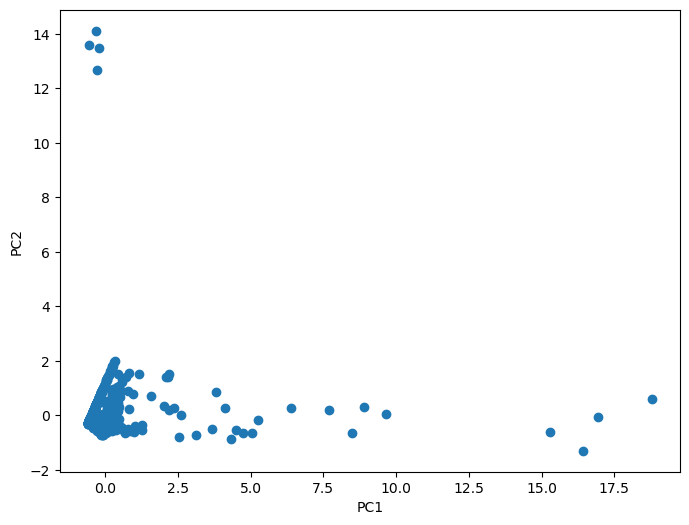

In [33]:
pcs_oi = [1,2]
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,pcs_oi[0]-1],x_pca[:,pcs_oi[1]-1])
plt.xlabel('PC'+str(pcs_oi[0]))
plt.ylabel('PC'+str(pcs_oi[1]))

In [34]:
pca.explained_variance_

array([1.94258682, 1.0156151 , 0.95764943, 0.95513326])

In [35]:
pd.to_datetime(df['Scraped Time']).dt.date.value_counts()

2021-06-16    1859744
2021-06-15     453200
Name: Scraped Time, dtype: int64